In [2]:
from helper import neural_modeling, clean_text, simple_bar
import tensorflow
import numpy as np
import langdetect

In [3]:
import pandas as pd

df = pd.read_csv('train.csv')

In [4]:
df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [5]:
df[df.keyword.isnull()].target.value_counts()

1    42
0    19
Name: target, dtype: int64

In [6]:
df[df.location.isnull()].target.value_counts()

0    1458
1    1075
Name: target, dtype: int64

In [7]:
df.text = df.text.apply(lambda x: clean_text(x))

In [8]:
df[df.text == '']

,id,keyword,location,text,target
5115,7295,nuclear%20reactor,NaN,,0


In [9]:
df.drop(5115, inplace=True)

In [10]:
df.shape

(7612, 5)

In [11]:
df.target.value_counts()

0    4341
1    3271
Name: target, dtype: int64

In [12]:
bigrams = simple_bar(df, gram=2, n_most=10)

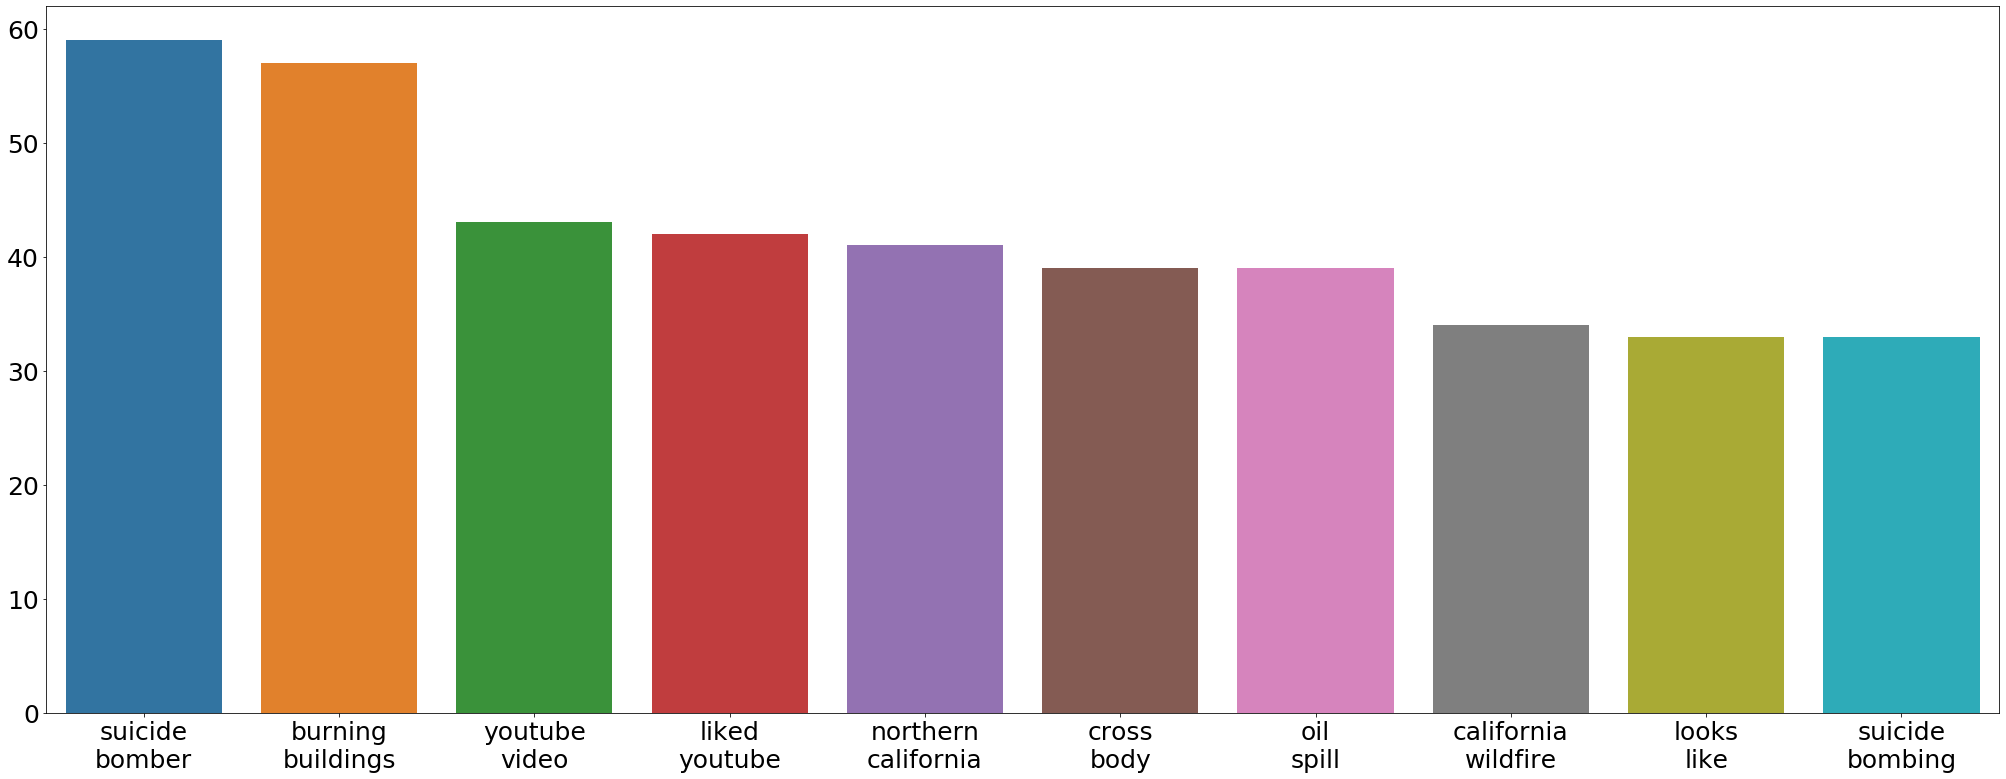

In [14]:
bigrams.barplot()

In [15]:
bigrams_zero = simple_bar(df[df.target == 0], gram=2, n_most=10)

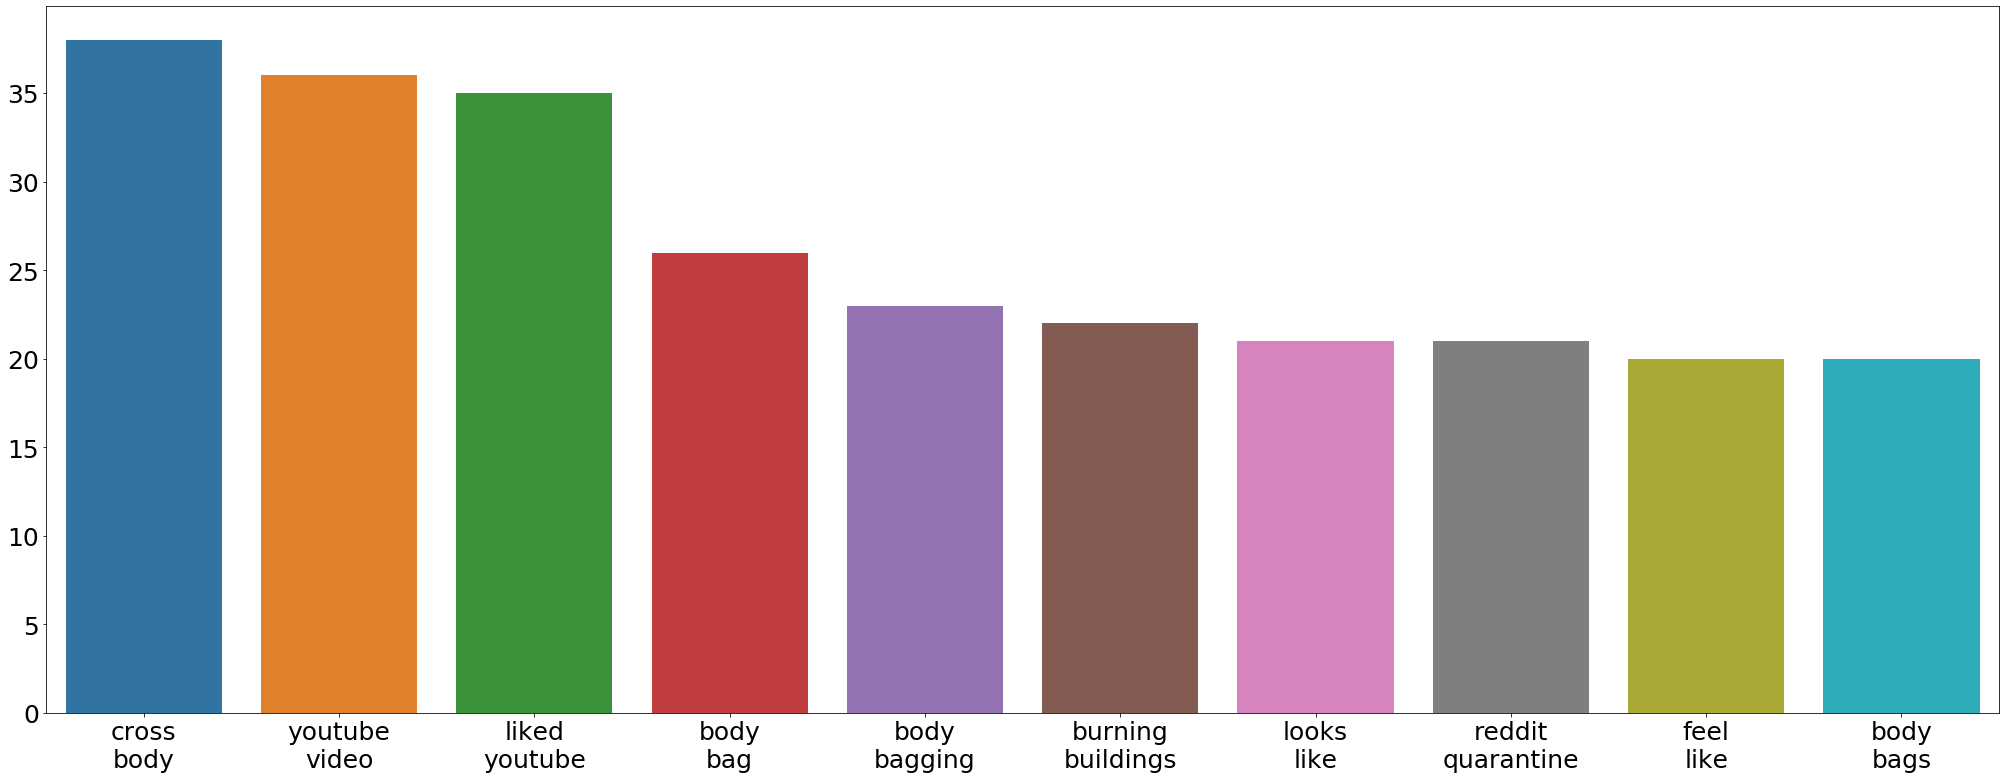

In [17]:
bigrams_zero.barplot()

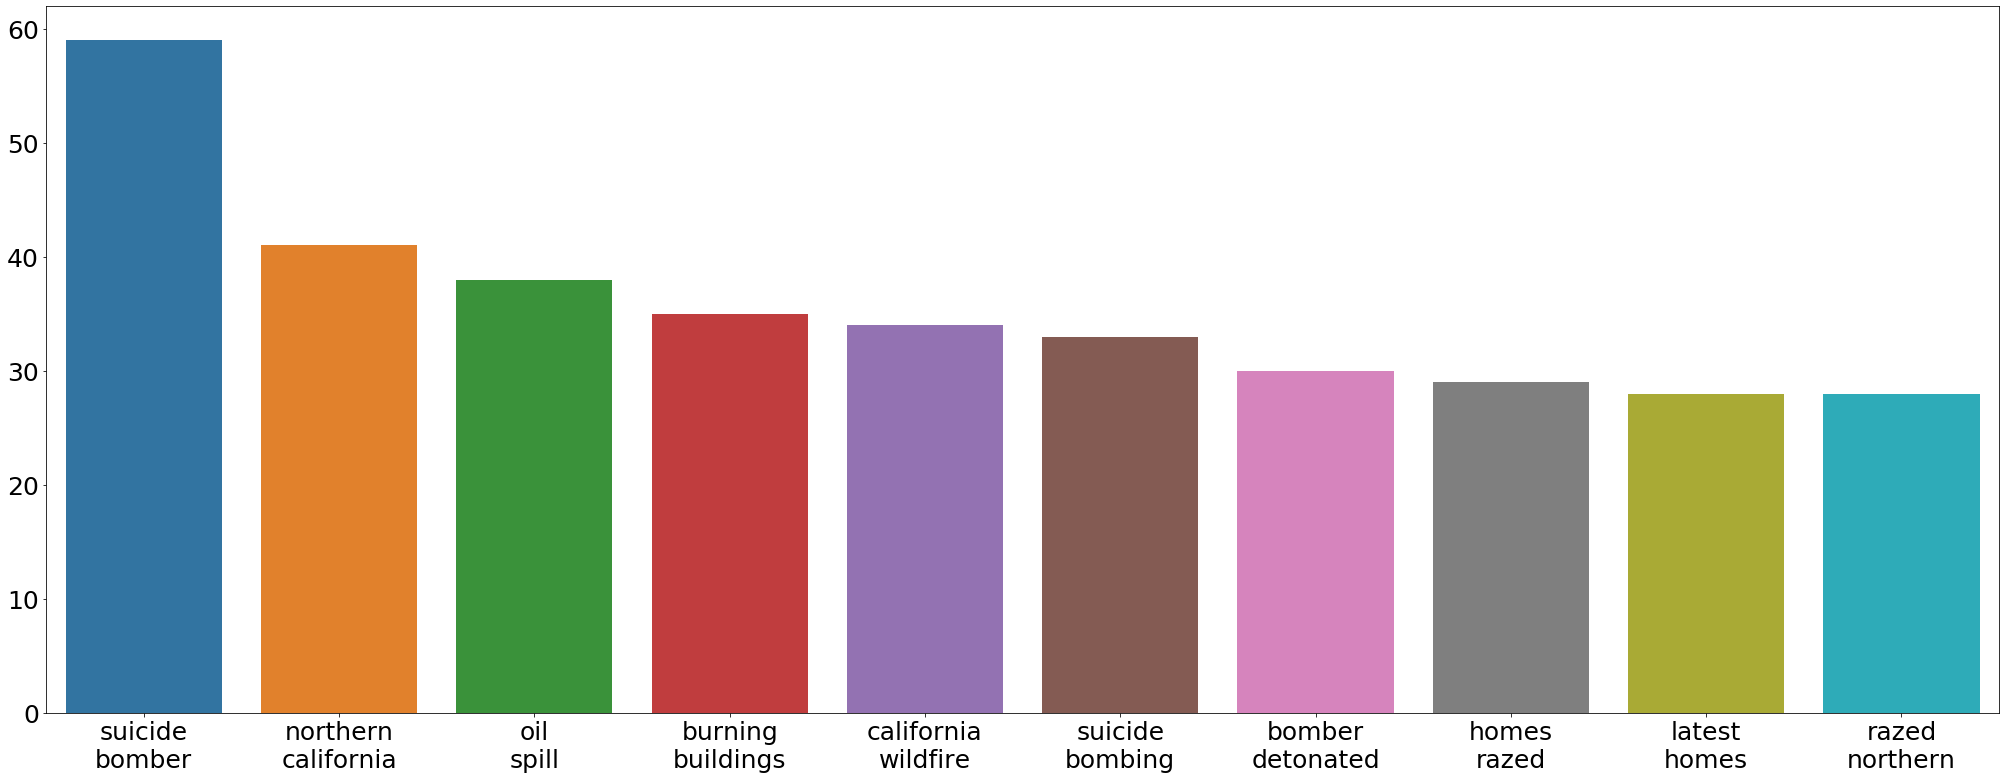

In [19]:
bigrams_one = simple_bar(df[df.target == 1], gram=2, n_most=10)
bigrams_one.barplot()

In [12]:
trigrams = simple_bar(df, gram=3, n_most=10)

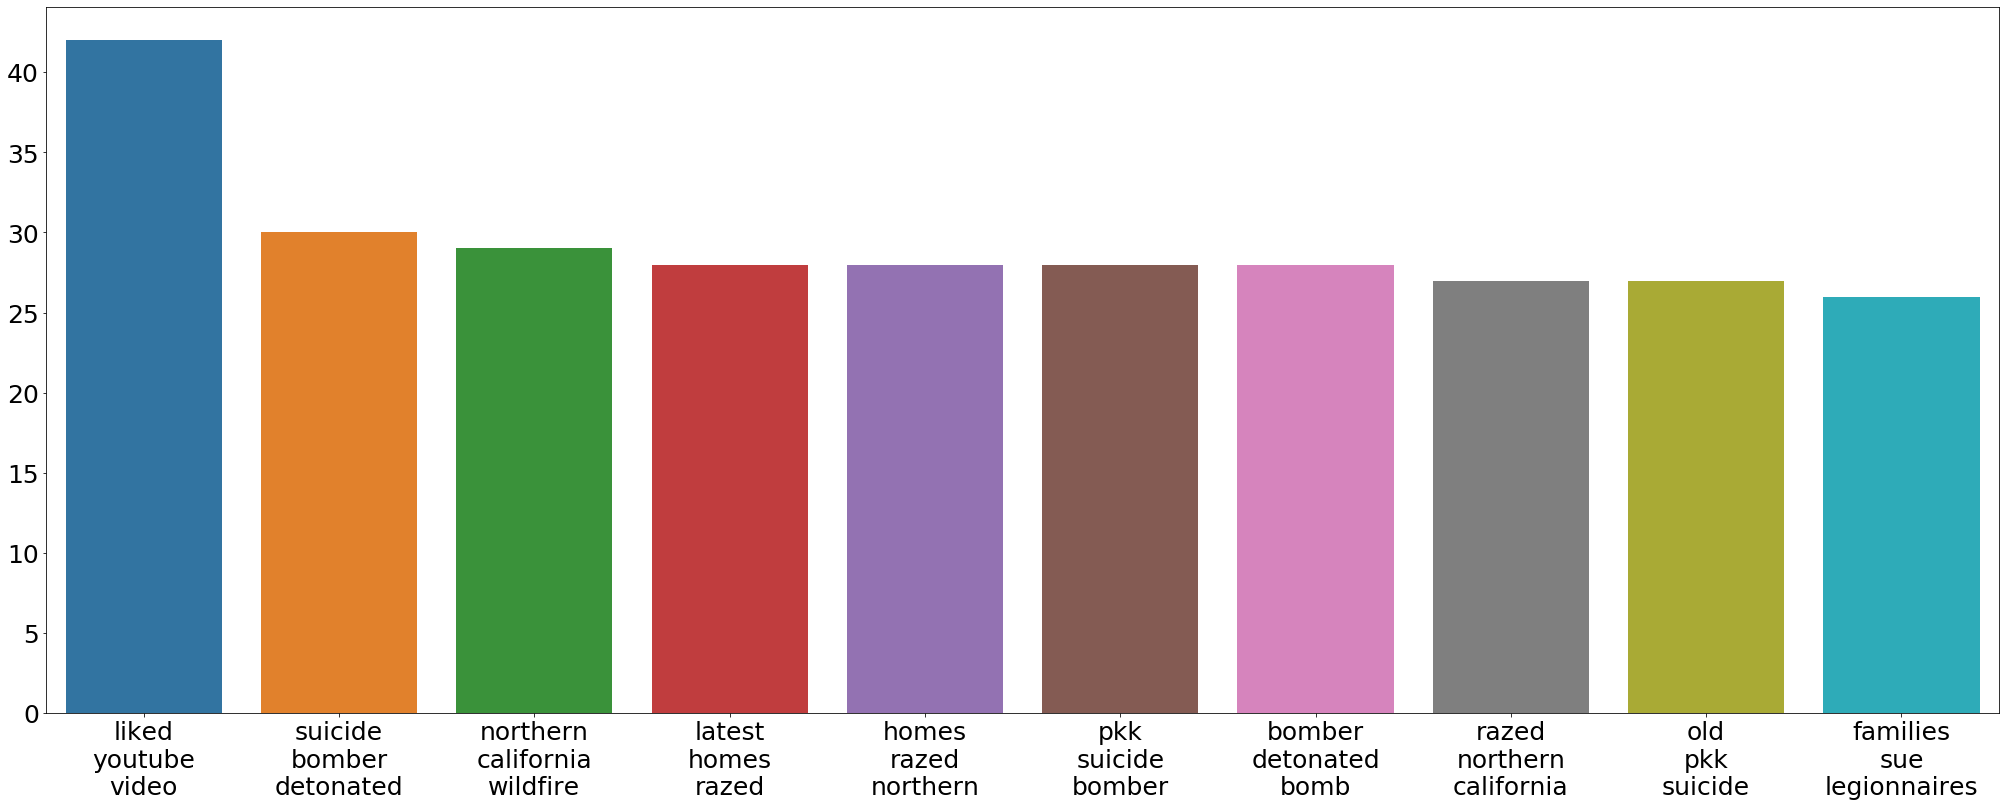

In [13]:
trigrams.barplot()

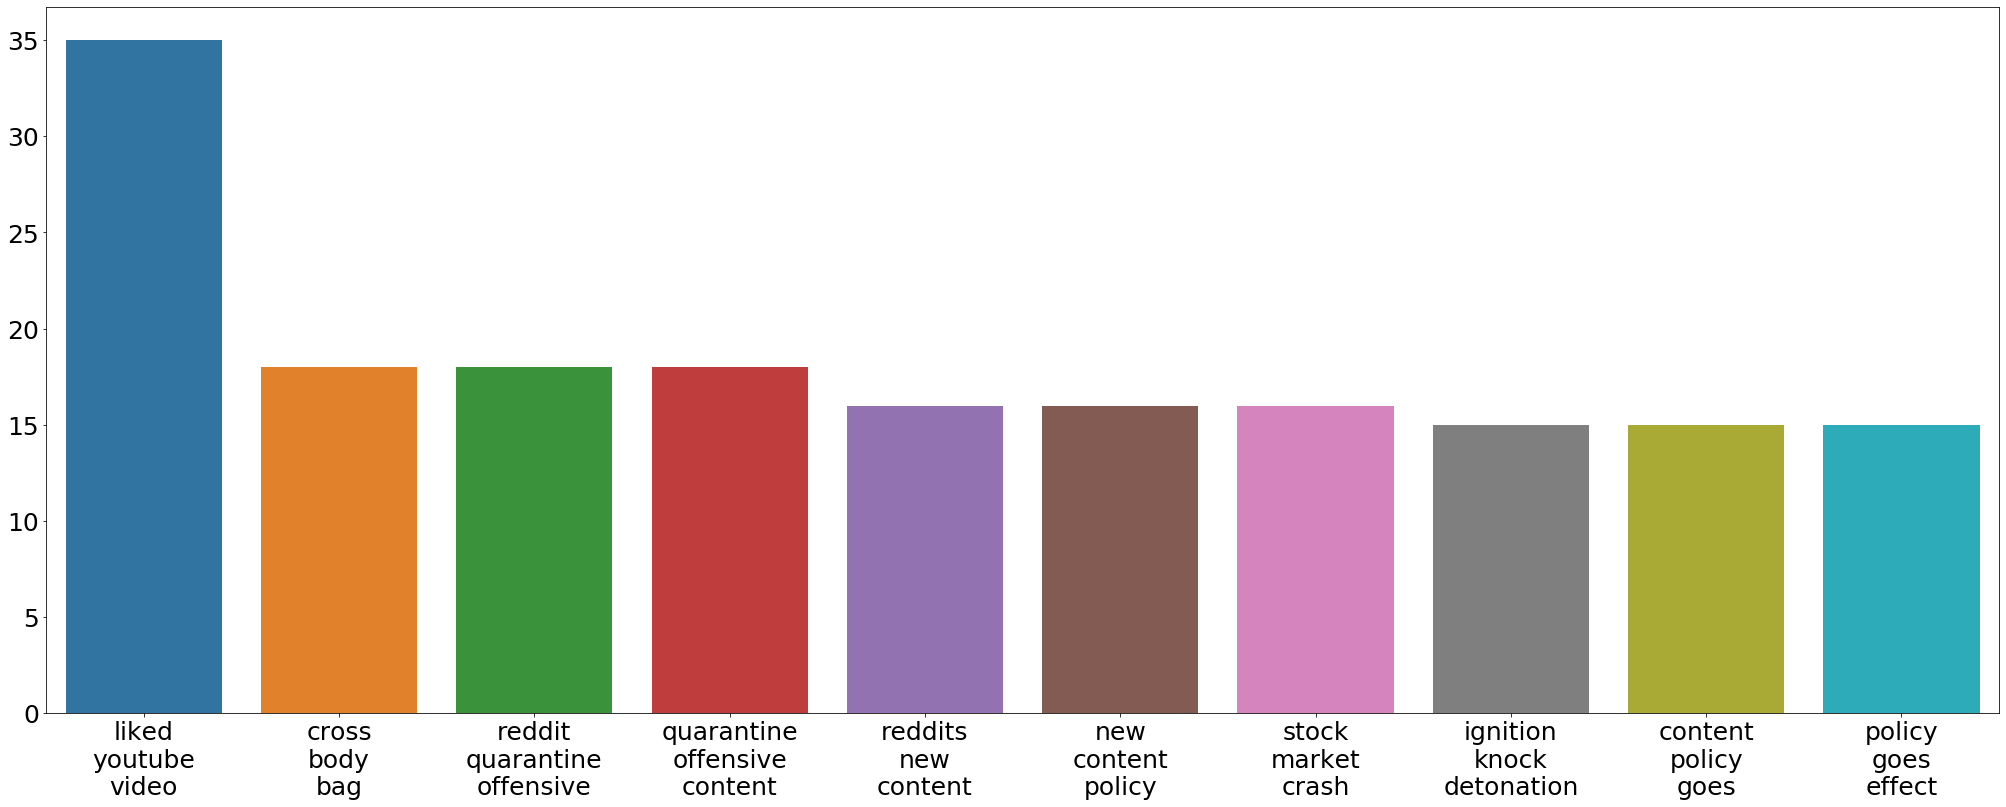

In [41]:
trigram_zero = simple_bar(df[df.target == 0], gram=3, n_most=10)
trigram_zero.barplot()

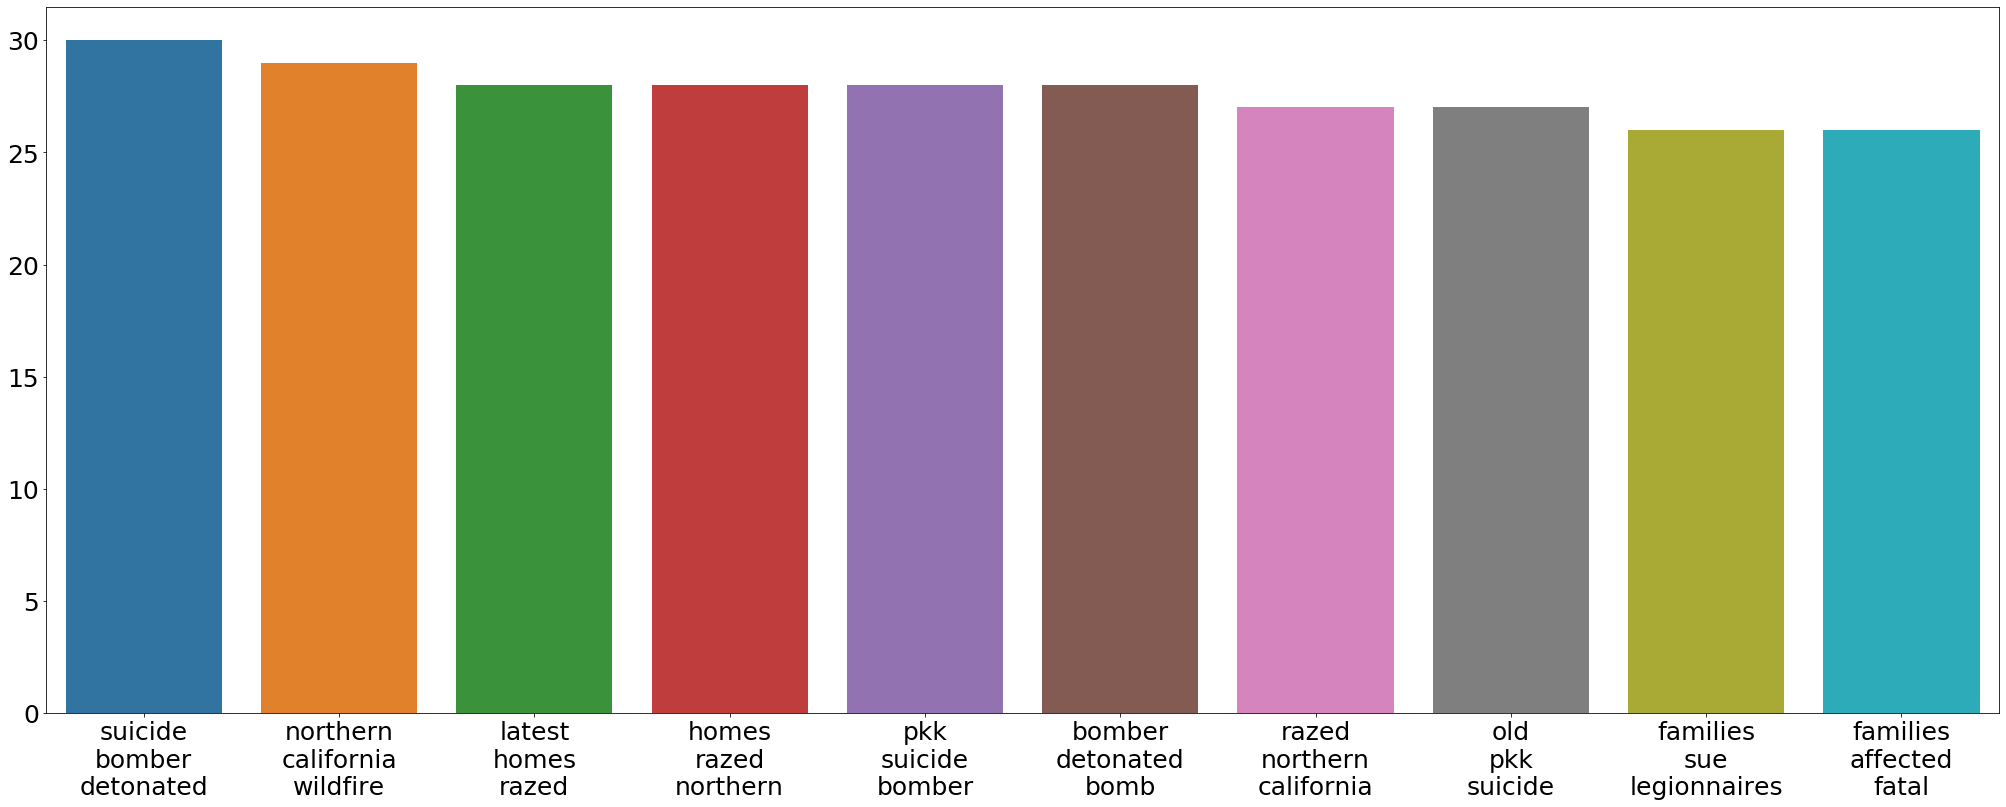

In [24]:
trigram_one = simple_bar(df[df.target == 1], gram=3, n_most=10)
trigram_one.barplot()

In [13]:
df.groupby("keyword").mean().sort_values('target', ascending=False).head(15)

,id,target
keyword,,
debris,3126.270270,1.000000
wreckage,10759.717949,1.000000
derailment,3526.128205,1.000000
outbreak,7569.700000,0.975000
oil%20spill,7520.763158,0.973684
typhoon,10081.947368,0.973684
suicide%20bombing,9217.393939,0.969697
suicide%20bomber,9165.354839,0.967742
bombing,1649.724138,0.931034


In [14]:
df['lang'] = df.text.apply(lambda x: langdetect.detect(x))

In [15]:
df[df.lang == 'en'].target.value_counts()

0    4091
1    3158
Name: target, dtype: int64

In [16]:
df[df.lang != 'en'].target.value_counts()

0    250
1    113
Name: target, dtype: int64

In [17]:
df_en = df[df.lang == 'en']

In [18]:
df_nonen = df[df.lang != 'en']

In [24]:
df_nonen.groupby(df_nonen.lang).mean().sort_values('target', ascending=False)

,id,target
lang,,
sq,5673.250000,0.750000
fi,7593.666667,0.666667
ca,6390.941176,0.617647
sw,9811.500000,0.500000
sk,9510.000000,0.500000
ro,6273.846154,0.461538
es,4878.727273,0.454545
pt,8209.000000,0.428571
nl,6185.842105,0.421053


In [27]:
df_nonen[df_nonen.lang == 'ca'].target.value_counts()

1    21
0    13
Name: target, dtype: int64

In [67]:
df_en.groupby('keyword').mean().sort_values('target', ascending=False).head(15)

,id,target
keyword,,
wreckage,10759.500000,1.000000
derailment,3526.128205,1.000000
debris,3126.270270,1.000000
outbreak,7569.410256,0.974359
oil%20spill,7520.763158,0.973684
typhoon,10081.947368,0.973684
suicide%20bombing,9217.000000,0.968750
suicide%20bomber,9165.222222,0.944444
nuclear%20disaster,7271.484848,0.939394


In [78]:
df.location.value_counts()

USA                        104
New York                    71
United States               50
London                      45
Canada                      29
                          ... 
Far Away From Home           1
Roads/Trails Everywhere      1
Republica Dominicana         1
somewhere outside            1
#expelcl*y                   1
Name: location, Length: 3341, dtype: int64

In [86]:
df

,id,keyword,location,text,target,lang
0,1,NaN,NaN,our deeds are the reason of this earthquake ma...,1,en
1,4,NaN,NaN,forest fire near la ronge sask canada,1,no
2,5,NaN,NaN,all residents asked to shelter in place are be...,1,en
3,6,NaN,NaN,people receive wildfires evacuation orders in...,1,en
4,7,NaN,NaN,just got sent this photo from ruby alaska as s...,1,en
...,...,...,...,...,...,...
7608,10869,NaN,NaN,two giant cranes holding a bridge collapse int...,1,en
7609,10870,NaN,NaN,ariaahrary thetawniest the out of control wild...,1,en
7610,10871,NaN,NaN,s of volcano hawaii,1,en
7611,10872,NaN,NaN,police investigating after an ebike collided w...,1,en


In [10]:
embedding_dict={}
with open('glove.6B.300d.txt','r') as f:
    for line in f:
        values=line.split()
        word = values[0]
        vectors=np.asarray(values[1:],'float64')
        embedding_dict[word]=vectors
f.close()

In [151]:
from nltk.tokenize import word_tokenize
from tqdm import tqdm

def create_corpus_new(df):
    corpus=[]
    for review in tqdm(df['text']):
        words=[word.lower() for word in word_tokenize(review)]
        corpus.append(words)
    return corpus   

In [152]:
corpus = create_corpus_new(df_en)

100%|██████████| 4855/4855 [00:00<00:00, 8055.38it/s]


In [153]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

MAX_LEN=150
tokenizer_obj=Tokenizer()
tokenizer_obj.fit_on_texts(corpus)
sequences=tokenizer_obj.texts_to_sequences(corpus)
tweet_pad=pad_sequences(sequences,maxlen=MAX_LEN,truncating='post',padding='post')

In [154]:
word_index=tokenizer_obj.word_index
print('Number of unique words:',len(word_index))

Number of unique words: 13446


In [155]:
num_words=len(word_index)+1
embedding_matrix=np.zeros((num_words,300))

for word,i in tqdm(word_index.items()):
    if i < num_words:
        emb_vec=embedding_dict.get(word)
        if emb_vec is not None:
            embedding_matrix[i]=emb_vec           

100%|██████████| 13446/13446 [00:00<00:00, 336897.32it/s]


In [156]:
tweet_pad.shape

(4855, 150)

In [157]:
pd.get_dummies(df_en.target)

,0,1
31,0,1
32,1,0
33,0,1
34,1,0
35,1,0
...,...,...
7575,1,0
7577,1,0
7579,1,0
7580,1,0


In [158]:
tweet_pad.shape

(4855, 150)

In [160]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
X, y = oversample.fit_resample(tweet_pad, df_en.target)

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [162]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y ,test_size=0.2)

In [86]:
from sklearn.model_selection import train_test_split
import pandas as pd
from keras.preprocessing import sequence, text

total_vocab = set(word for text in df_en.text for word in text.split(' '))

tokenizer = text.Tokenizer(num_words=len(total_vocab))
tokenizer.fit_on_texts(df.text)
tokenized_list = tokenizer.texts_to_sequences(df.text)
padded_seq = sequence.pad_sequences(tokenized_list)
target_dummies = pd.get_dummies(df.target)

X_train, X_test, y_train, y_test = train_test_split(padded_seq, pd.get_dummies(df.target), test_size=0.2)


In [173]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, GlobalMaxPooling1D, Dropout, Bidirectional, Conv1D, Activation, BatchNormalization

model = Sequential()
embedding_size=150
model.add(Embedding(len(total_vocab), embedding_size))
model.add(Conv1D(64, kernel_size=5, padding='valid', activation='softmax', strides=1))
model.add(Bidirectional(LSTM(150, return_sequences=True)))
model.add(GlobalMaxPooling1D())
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy', 'mse'])

model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_12 (Embedding)     (None, None, 150)         2017950   
_________________________________________________________________
conv1d_3 (Conv1D)            (None, None, 64)          48064     
_________________________________________________________________
bidirectional_11 (Bidirectio (None, None, 300)         258000    
_________________________________________________________________
global_max_pooling1d_7 (Glob (None, 300)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 301       
Total params: 2,324,315
Trainable params: 2,324,315
Non-trainable params: 0
_________________________________________________________________


In [174]:
model.fit(X_train, y_train, epochs=10, batch_size=16, validation_split=0.2)

print('-------Accuracy-------', '\n')
print(model.evaluate(X_test, y_test))

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/tensorflow_core/python/framework/indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 3494 samples, validate on 874 samples
Epoch 1/10
3494/3494 [==============================] - 39s 11ms/step - loss: 0.6913 - accuracy: 0.5137 - mse: 0.2491 - val_loss: 0.6648 - val_accuracy: 0.5892 - val_mse: 0.2360
Epoch 2/10
3494/3494 [==============================] - 40s 11ms/step - loss: 0.4816 - accuracy: 0.7831 - mse: 0.1570 - val_loss: 0.5030 - val_accuracy: 0.7654 - val_mse: 0.1671
Epoch 3/10
3494/3494 [==============================] - 38s 11ms/step - loss: 0.2731 - accuracy: 0.8904 - mse: 0.0821 - val_loss: 0.6537 - val_accuracy: 0.7231 - val_mse: 0.1989
Epoch 4/10
3494/3494 [==============================] - 39s 11ms/step - loss: 0.1502 - accuracy: 0.9465 - mse: 0.0418 - val_loss: 0.6507 - val_accuracy: 0.7391 - val_mse: 0.1962
Epoch 5/10
3494/3494 [==============================] - 38s 11ms/step - loss: 0.0909 - accuracy: 0.9688 - mse: 0.0247 - val_loss: 0.7570 - val_accuracy: 0.7288 - val_mse: 0.2097
Epoch 6/10
3494/3494 [==============================] - 39s 11m

KeyboardInterrupt: 

In [39]:
model.metrics_names

['loss', 'accuracy', 'mse']

In [40]:
test = pd.read_csv('test.csv')

In [127]:
test.keyword.value_counts()

deluged               23
demolished            22
rubble                22
seismic               21
first%20responders    21
                      ..
threat                 5
fatalities             5
forest%20fire          5
inundation             4
epicentre              1
Name: keyword, Length: 221, dtype: int64

In [41]:
tokenized_list_test = tokenizer.texts_to_sequences(test.text)
padded_seq = sequence.pad_sequences(tokenized_list_test)

In [42]:
y_pred = model.predict(padded_seq)

In [26]:
test_list = []

for i in y_pred:
    test_list.append(np.argmax(i))

In [27]:
sample_sub = pd.read_csv('sample_submission.csv')

In [28]:
sample_sub

,id,target
0,0,0
1,2,0
2,3,0
3,9,0
4,11,0
...,...,...
3258,10861,0
3259,10865,0
3260,10868,0
3261,10874,0


In [29]:
result = pd.DataFrame({'id':sample_sub['id'], 'target': np.array(test_list)})

In [30]:
result

,id,target
0,0,0
1,2,0
2,3,1
3,9,1
4,11,1
...,...,...
3258,10861,0
3259,10865,0
3260,10868,1
3261,10874,0


In [31]:
result.set_index('id', inplace=True)

In [32]:
result

,target
id,
0,0
2,0
3,1
9,1
11,1
...,...
10861,0
10865,0
10868,1


In [33]:
result.to_csv('result.csv')